In [8]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint

from config import wsapikey
from config import censuskey

from scipy import stats

from scipy.stats.stats import pearsonr   
 


In [9]:
#CookCo
cookco ='cookco_zips.csv'
census = 'census_data_chi_zips.csv'
walkscore = 'chi_zip_scores.csv'


In [10]:
cookco_table= pd.read_csv(cookco)
census_table= pd.read_csv(census)
ws_table= pd.read_csv(walkscore, delimiter=",")

In [11]:
merge_table1 = pd.merge(cookco_table, ws_table, left_on="ZipCode", 
                       right_on='zipcode', how='left')

In [12]:
merge_table = pd.merge(merge_table1, census_table, left_on="ZipCode", 
                       right_on="Zipcode",how="left")


In [13]:
list(merge_table)

['Unnamed: 0_x',
 'ZipCode',
 'HousingUnits',
 'Population_x',
 'Households',
 'Families',
 'MedianAge',
 'MedianHouseholdIncome',
 'MedianHomeValue',
 'Unnamed: 0_y',
 'Unnamed: 0.1',
 'zipcode',
 'walkscore',
 'transitscore',
 'bikescore',
 'ZIP',
 'LAT',
 'LNG',
 'Zipcode',
 'Area',
 'Population_y',
 'Population_ME',
 'Median Age',
 'Household Income',
 'Per Capita Income',
 'Income over $75K*',
 '% of Pop Income $75+',
 'Poverty Count',
 'Poverty Rate',
 "Time to work (don't use)",
 'Worked outside home',
 'Drive to work',
 'Public transit to work',
 'Biked to work',
 'Walked to work',
 'Worked at home',
 'Drive to work -%  total pop',
 'Public transit to work -%  total pop',
 'Biked to work -% total pop',
 'Walked to work -% total pop',
 'Worked at home  - % total pop',
 '% Transiting  to work (any form)',
 'Drive to work - % commuters',
 'Public transit to work -% commuters',
 'Biked to work - % commuters',
 'Walked to work - % commuters',
 'Pop Under 5 years',
 'Pop 5-9 years',


In [14]:
merge_table["household_size"]=merge_table["Population_x"]/merge_table["Households"]
merge_table["Per Capita Income"].head()
merge_table.to_csv('merge_table2.csv')

In [15]:
def quadratic_pol(x_axis,y_axis):
    degree = 2
    coeffs = np.polyfit(x_axis, y_axis,degree)
    quadratic, linear, intercept = coeffs
    fits = quadratic*(x_axis**2)+linear*x_axis+intercept
    residuals=y_axis-fits
    totals_err=y_axis-y_axis.mean()
    residuals_squared=residuals**2
    totals_err_squared=totals_err**2
    ss_res=residuals_squared.sum()
    ss_tot=totals_err_squared.sum()
    r_squared=1-ss_res/ss_tot
    return quadratic, linear, intercept, r_squared

def linear_pol(x_axis,y_axis):
    degree = 1
    coeffs = np.polyfit(x_axis, y_axis,degree)
    linear, intercept = coeffs
    fits = linear*x_axis+intercept
    residuals=y_axis-fits
    totals_err=y_axis-y_axis.mean()
    residuals_squared=residuals**2
    totals_err_squared=totals_err**2
    ss_res=residuals_squared.sum()
    ss_tot=totals_err_squared.sum()
    r_squared=1-ss_res/ss_tot
    corr=pearsonr(x_axis, y_axis)
    return linear, intercept, r_squared, corr

In [16]:
def scatter(df,x_axis,y_axis,title,x_label,y_label,color,intercept,linear,quadratic,statistic):
    df=df.sort_values(x_axis, ascending=1)
    line = quadratic*df[x_axis]**2+linear*df[x_axis]+intercept
    min_loc=df[x_axis].min()
    max_loc=df[y_axis].max()
    plt.text(min_loc,max_loc,statistic, fontsize=12,va="top")
    plt.title(title,fontsize=18)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(df[x_axis], df[y_axis], marker="o", color=color,s=50,zorder=1)
    plt.plot(df[x_axis],line,zorder=2,color="gray")  

In [17]:
def scatter_cell(df,x_axis,y_axis,color,degree):
    if degree==2:
        quadratic, linear, intercept, r_squared=quadratic_pol(df[x_axis], df[y_axis])
        statistic="R2 = "+str(round(r_squared,4))
        scatter(df,x_axis,y_axis,x_axis+" vs "+ y_axis,x_axis,y_axis,color,intercept,linear,quadratic,statistic)
    else:
        linear, intercept, r_squared,corr=linear_pol(df[x_axis], df[y_axis])
        statistic="Corr = "+str(round(r_squared,4))
        scatter(df,x_axis,y_axis,x_axis+" vs "+ y_axis,x_axis,y_axis,color,intercept,linear,0,statistic)       

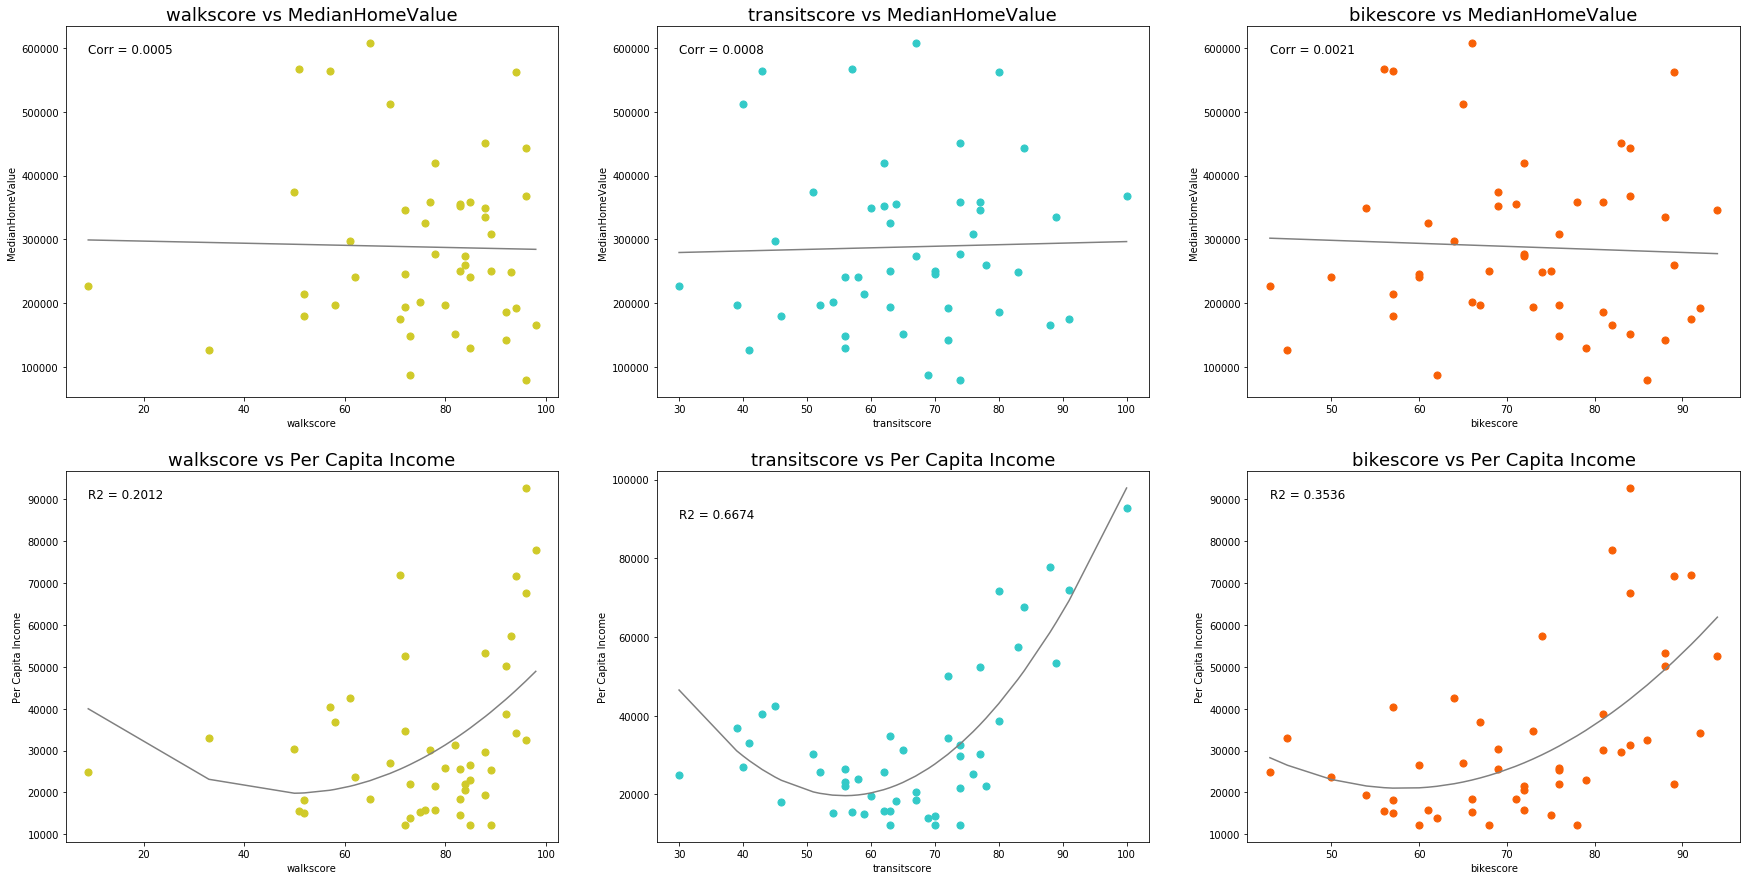

In [22]:
merge_table=merge_table.dropna()
plt.figure(figsize=(30,15))


plt.subplot(2, 3, 1)
scatter_cell(merge_table,'walkscore','MedianHomeValue',"#D0CA29",1)
plt.subplot(2, 3, 2)
scatter_cell(merge_table,'transitscore','MedianHomeValue',"#33CAC8",1)
plt.subplot(2, 3, 3)
scatter_cell(merge_table,'bikescore','MedianHomeValue',"#F86006",1)

plt.subplot(2, 3, 4)
scatter_cell(merge_table,'walkscore','Per Capita Income',"#D0CA29",2)
plt.subplot(2, 3, 5)
scatter_cell(merge_table,'transitscore','Per Capita Income',"#33CAC8",2)
plt.subplot(2, 3, 6)
scatter_cell(merge_table,'bikescore','Per Capita Income',"#F86006",2)


plt.show()

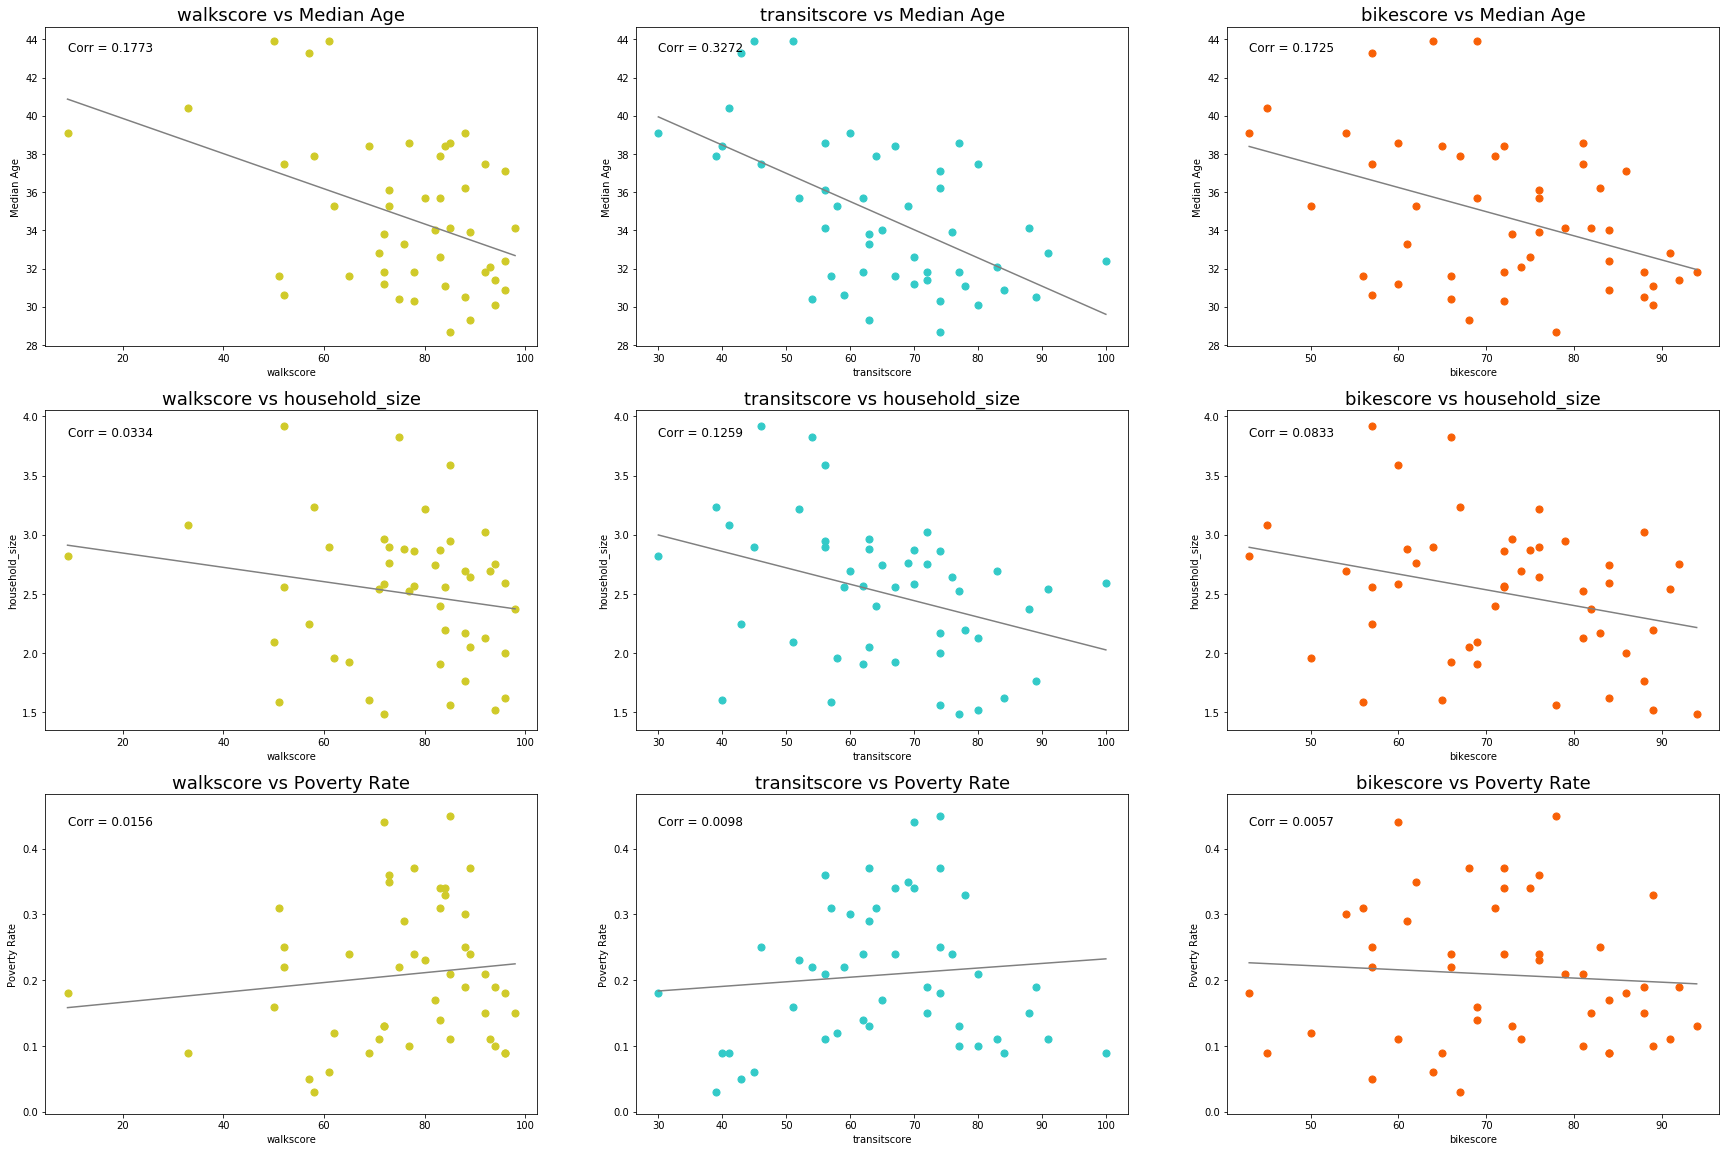

In [29]:
merge_table=merge_table.dropna()
plt.figure(figsize=(30,20))


plt.subplot(3, 3, 1)
scatter_cell(merge_table,'walkscore','Median Age',"#D0CA29",1)
plt.subplot(3, 3, 2)
scatter_cell(merge_table,'transitscore','Median Age',"#33CAC8",1)
plt.subplot(3, 3, 3)
scatter_cell(merge_table,'bikescore','Median Age',"#F86006",1)


plt.subplot(3, 3, 4)
scatter_cell(merge_table,'walkscore','household_size',"#D0CA29",1)
plt.subplot(3, 3, 5)
scatter_cell(merge_table,'transitscore','household_size',"#33CAC8",1)
plt.subplot(3, 3, 6)
scatter_cell(merge_table,'bikescore','household_size',"#F86006",1)

plt.subplot(3, 3, 7)
scatter_cell(merge_table,'walkscore','Poverty Rate',"#D0CA29",1)
plt.subplot(3, 3, 8)
scatter_cell(merge_table,'transitscore','Poverty Rate',"#33CAC8",1)
plt.subplot(3, 3, 9)
scatter_cell(merge_table,'bikescore','Poverty Rate',"#F86006",1)





#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()